##  The Seattle Housing Market

### Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import itertools
import os

In [2]:
df = pd.read_csv('kc_house_data.csv')

### Data Dictionary

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

    •	id: unique identifier
    •	date: Date house was sold
    •	price: Price is (Target variable)
    •	bedrooms: Number of Bedrooms/House
    •	bathrooms: Number of bathrooms/bedrooms
    •	sqft_living: square footage of the home
    •	sqft_lot: square footage of the lot
    •	floors :Total floors in the home
    •	waterfront :Home with a view to a waterfront
    •	view: Has been viewed by buyers
    •	condition: Home condition 
    •	grade: overall grade given to the housing unit, based on King County grading system
    •	sqft_above: square footage of home apart from basement
    •	sqft_basement: square footage of the basement
    •	yr_built: Year home was built
    •	yr_renovated: Year when home was renovated
    •	zipcode: zip code
    •	lat: Latitude coordinate
    •	long: Longitude coordinate
    •	sqft_living15: Living room area in 2015 (implies-- with some renovations) 
    •	sqft_lot15: lot-size area in 2015 (implies-- with some renovations)


### Data Preparation

#### Inspecting the Dataframe

In [3]:
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Use .info() to see length and dtypes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Data Wrangling

#### Data Organization

In [6]:
#Using a 15% split 
#for the test set may change, if the actual test set size is predefined. 
#In any case we will make sure the test set we choose from our dataset 
#is as similar as it can get to the actual data that it will see in 
#production'''


def mydf_splitter(df,num_rows):
    return df[:num_rows].copy(),df[num_rows:]


mydf_train_valid,mydf_test = mydf_splitter(df,1100)

print(mydf_train_valid.shape,mydf_test.shape)

(1100, 21) (20513, 21)


#### Number of Missing Values By Column

In [7]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of 
#Train_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'

missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
id,0,0.000000
long,0,0.000000
lat,0,0.000000
zipcode,0,0.000000
yr_renovated,0,0.000000
yr_built,0,0.000000
sqft_basement,0,0.000000
grade,0,0.000000
sqft_living15,0,0.000000
condition,0,0.000000


In [83]:
#no missing values - found less than 2% missing

#### Visualize Columns 

<AxesSubplot:>

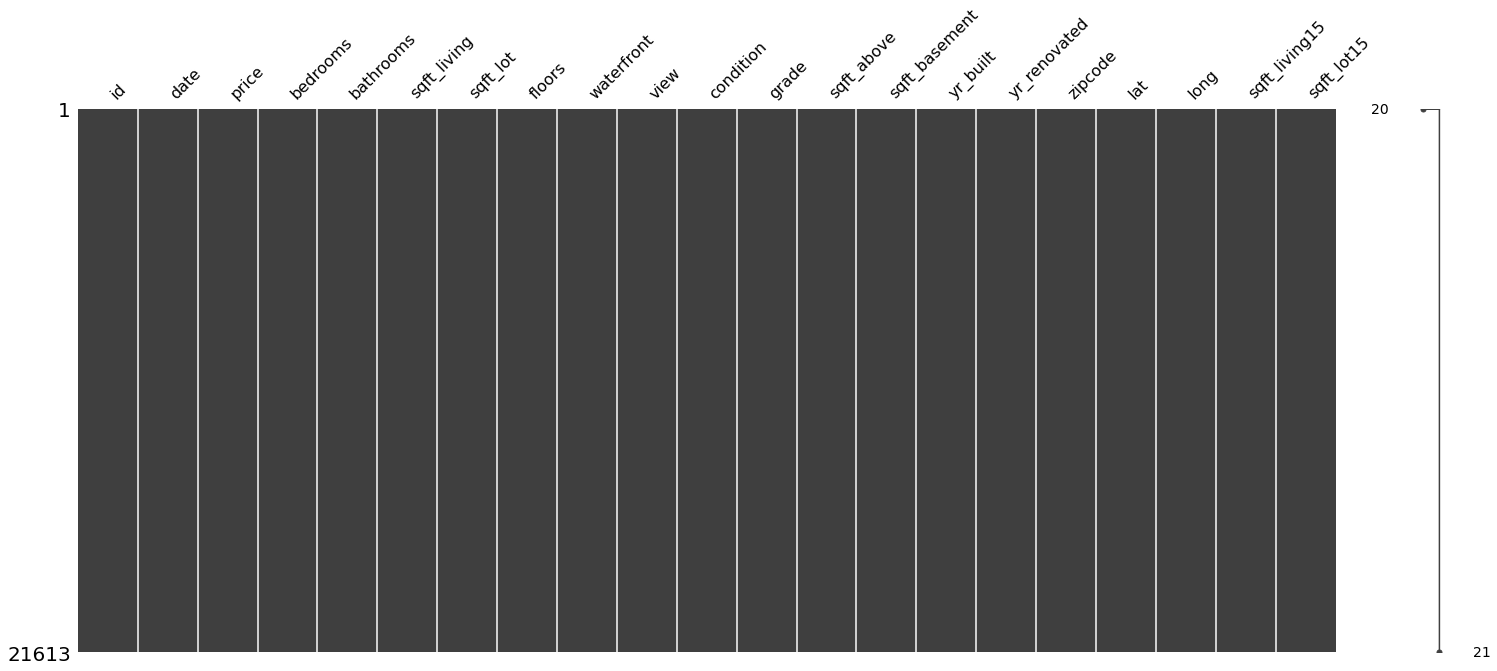

In [9]:
msno.matrix(df)

#### Are there duplicate rows?

In [75]:
if df['id'].nunique() == df.shape[0]:
    counts_per_id = df.groupby('id').size()
    more_than_one_sale = df[df.id.isin(counts_per_id[counts_per_id > 1].index)]
   

In [76]:
# rows with more than one sale with similar id
more_than_one_sale.sort_values(by = 'id').head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [42]:
# sorting dataframe
df.sort_values(['id', 'price'], inplace = True)
 
# dropping duplicate rows keeping latest ones
df.drop_duplicates(subset = 'id', keep = 'last', inplace = True)
 
# let's verify if all duplicate ids are removed
counts_per_id = df.groupby('id').size()
df.shape

(21436, 21)

Initially started with 21613 rows. Therefore duplicates have been removed from rows.

### Explore any Nulls

##### Now we can assess each column in each dataset for nulls. Let's write a function this time to iterate through the columns to see how much nulls there are.

In [43]:
for column in df.columns:
  null_count = len(df[df[column].isna()])
  print("{} : {}".format(column, null_count))

id : 0
date : 0
price : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 2
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


### Data Definition - (Take a deeper look at the data)

#### Examine the distribution of the target variable.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


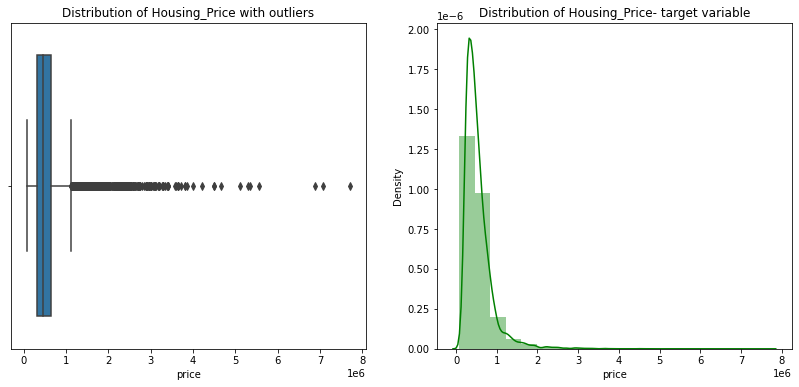

In [44]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(df.price)
plt.title("Distribution of Housing_Price with outliers")
plt.subplot(1,2,2)
sns.distplot(df['price'], bins=20, color = "Green")
plt.title("Distribution of Housing_Price- target variable")
plt.show()

#### Figures(1.0, 1.2) - Charts indicate obvious outliers. Further investigation is necessary

Distribution of Price is skewed to the right due to the tail of the outliers.

#### Verify Potential Outliers - Use IQR rule

In [45]:
# Verification on outliers

def cal_upper_lower(col):
    sorted(col)
    q1,q3 = col.quantile([0.25, 0.75])
    IQR = q3-q1
    upper = q3 + (1.5 * IQR)
    lower = q1 - (1.5 * IQR)
    return upper, lower

highprice, lowprice = cal_upper_lower(df['price'])
print("The upper and lower Housing Prices are {} and {} :" .format(highprice, lowprice))

The upper and lower Housing Prices are 1125201.0 and -155335.0 :


In [46]:
stat = df.price.describe().round(2)
print(stat)

count      21436.00
mean      541654.68
std       367316.79
min        75000.00
25%       324866.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: price, dtype: float64


#### Examine potential outlier below 75K Price Range

In [47]:
#check potential outlier below lower bound
df[df.price < 75000.00]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


The lower bound is negative and there aren't any negative values in the price column so let's investigate the houses with prices above the upper bound.

#### Examine potential outlier above the 1-Million Price Range

In [48]:
df[df['price'] > 1700000.00]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11673,46100350,20140630T000000,1730000.0,5,3.50,5000,26540,2.0,0,3,...,10,3410.0,1590,2008,0,98040,47.5665,-122.210,3360,17398
17980,46100504,20140617T000000,2027000.0,4,3.75,4100,22798,1.5,0,3,...,11,2540.0,1560,1934,1979,98040,47.5648,-122.210,3880,18730
8443,125069038,20141125T000000,2140000.0,4,3.75,5150,453895,2.0,0,3,...,11,4360.0,790,1997,0,98053,47.6795,-121.991,2500,215186
12509,249000180,20141201T000000,1890000.0,4,4.25,4285,9345,2.0,0,0,...,10,4285.0,0,2013,0,98004,47.6332,-122.199,1570,8994
20168,250000010,20140924T000000,1750000.0,4,3.50,3845,8400,2.0,0,0,...,10,3845.0,0,2013,0,98004,47.6354,-122.198,1710,8400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,9808700405,20140604T000000,1901000.0,3,2.50,2660,13367,2.0,0,2,...,10,2660.0,0,1992,0,98004,47.6501,-122.217,2660,13367
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680.0,2360,1940,2001,98004,47.6500,-122.214,3930,25449
4923,9809000020,20150313T000000,1940000.0,5,2.25,3120,16672,2.0,0,0,...,9,3120.0,0,1969,0,98004,47.6458,-122.219,3740,17853
19758,9831200159,20140806T000000,2250000.0,3,3.25,3890,3452,2.0,0,0,...,12,2890.0,1000,2006,0,98102,47.6260,-122.323,2860,2199


In [49]:
# examine the outliers below the low Price
df[df['price'] < lowprice].shape

(0, 21)

In [50]:
# examine the outliers above the high Price
df[df['price'] > highprice].shape

(1143, 21)

There are 1143 houses that are above the high price. Let's investigate if there is something unusual going on. It would make sense for houses to be pricier if their descritpion seems worth it. Like for eg: 'sqft_living'

In [51]:
outliers_above_upper = df[df['price'] > highprice]

# let's look at houses with high prices but below avg sqft_living
outliers_above_upper[outliers_above_upper['sqft_living']<2000].shape

(17, 21)

In [52]:
# smaller pricy houses in exceptional condition?
outliers_above_upper[(outliers_above_upper['sqft_living']<2000) &\
                     (outliers_above_upper['condition']>3)].shape

(8, 21)

From our analysis, their appears to be 8 smaller homes in the area sold for prices that are above the high range. And that their condition are exceptional. We will leave them be for now.

#### Identify numerical and categorical variables in dataset

In [53]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [54]:
numeric_cols = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [55]:
categorical_cols = ['date']

## Exploratory Data Analysis

### Visualize Target variable

Examine some of the numerical features related with the target variable.

#### Sqft living in relation to Price - figure 1.3

(0.0, 8083923.228977313)

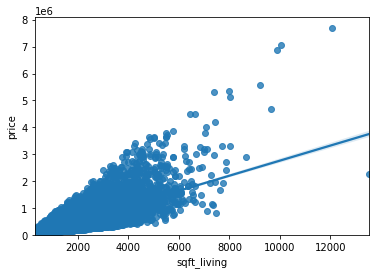

In [56]:
sns.regplot(x="sqft_living", y="price", data=df)
plt.ylim(0,)

#### Sqft lot size in relation to Price - figure 1.4

(0.0, 8081250.0)

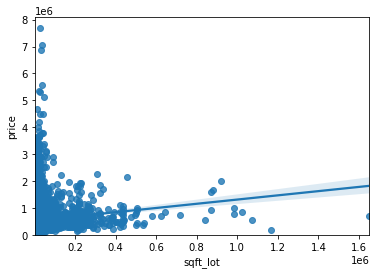

In [57]:
sns.regplot(x="sqft_lot", y="price", data=df)
plt.ylim(0,)

#### Bathrooms in relation to Price - figure 1.5

(0.0, 8085713.870683689)

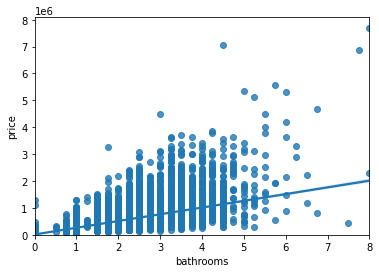

In [58]:
sns.regplot(x="bathrooms", y="price", data=df)
plt.ylim(0,)

#### Bedrooms in relation to Price - figure 1.6

(0.0, 8081250.0)

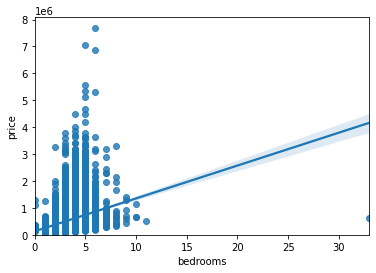

In [59]:
sns.regplot(x="bedrooms", y="price", data=df)
plt.ylim(0,)

#### Year home was built in relation to Price - figure 1.7

(0.0, 8081250.0)

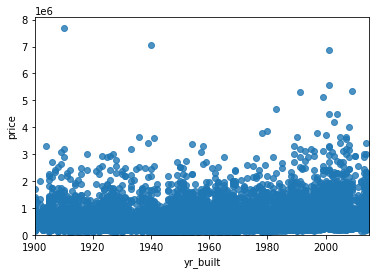

In [60]:
sns.regplot(x="yr_built", y="price", data=df)
plt.ylim(0,)

#### Homes with waterfront view in relation to Price Figure 1.8 

<AxesSubplot:xlabel='waterfront', ylabel='price'>

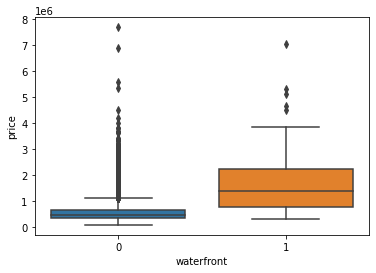

In [61]:
sns.boxplot(x="waterfront", y="price", data=df)

Note: waterfront view have more price outliers

#### Homes Graded by Realtor - Figure 1.9

<AxesSubplot:xlabel='grade', ylabel='price'>

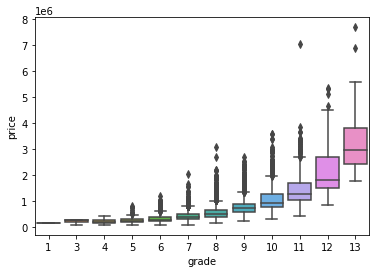

In [82]:
sns.boxplot(x="grade", y="price", data=df)

Note: Homes with higher grade scores were more expensive with the least outliers.

#### Correlation matrices for all variables

We can use the Pandas method corr()  to find the feature other than price that is most correlated with price

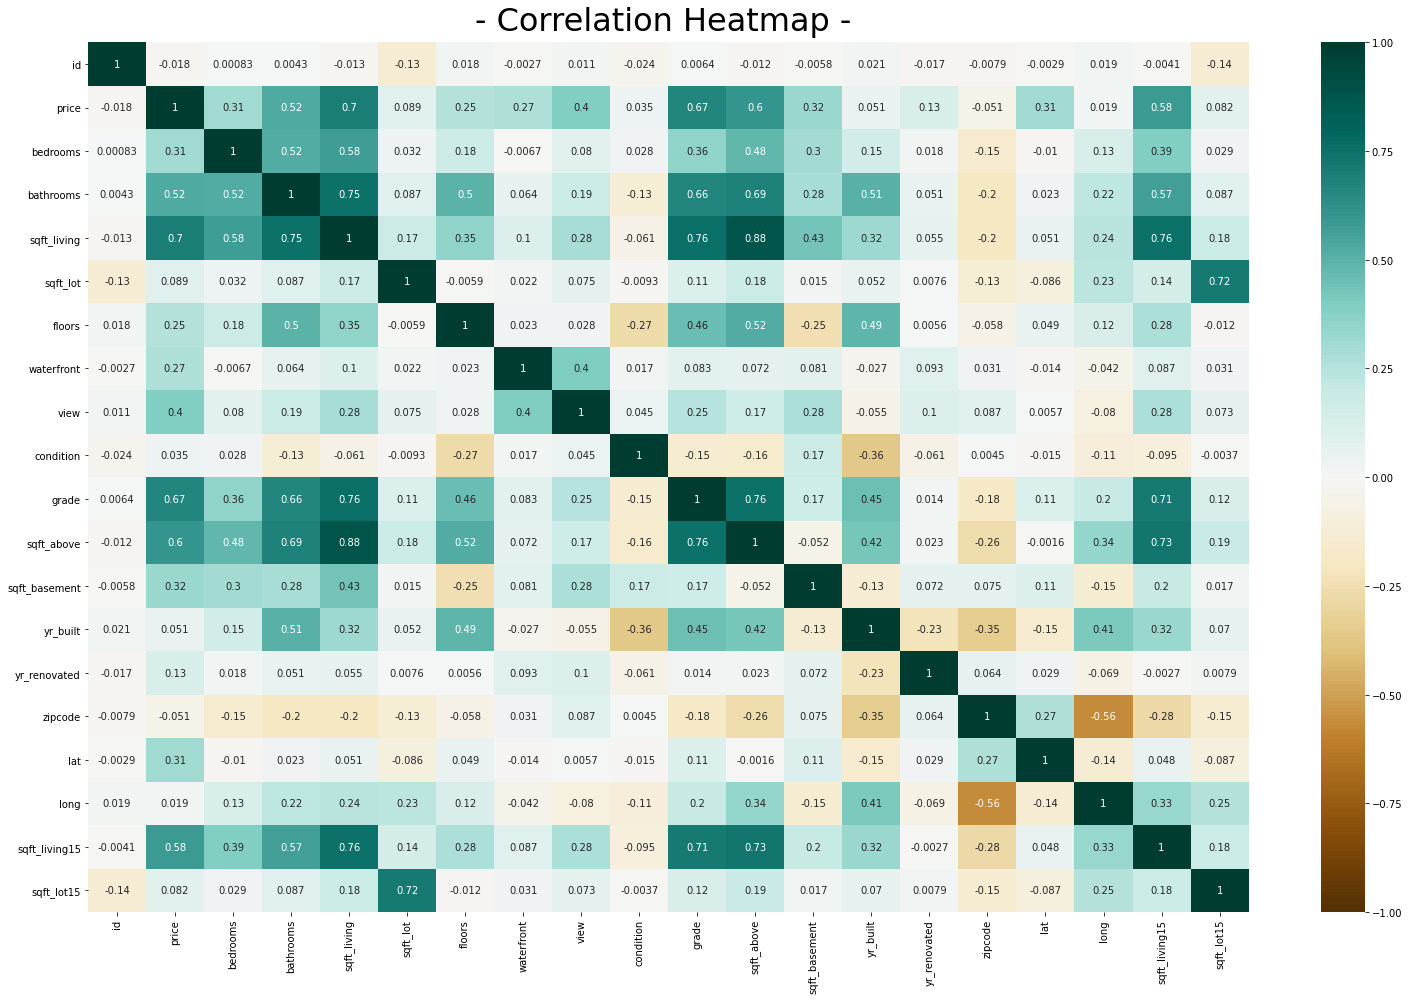

In [62]:
plt.figure(figsize=(26, 16))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('- Correlation Heatmap - ', fontdict={'fontsize':32}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

#### Fig 2.0 . Shows good correlations with price and the following:  sqft_living, grade, bathrooms, bedroom, grade, and sqft_above.

There is a strong correlation between sqft_living, sqft_living15' and sqft_above. We will use sqft_living for now for representation. 

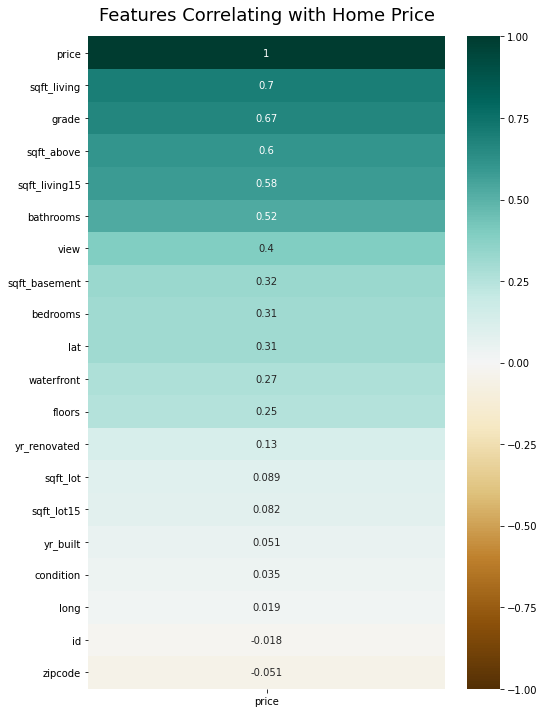

In [63]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Home Price', fontdict={'fontsize':18}, pad=16);

#### In figure (2.1) there is a strong correlation between home square footage and renovated homes in this representation.